# Objetivo do Projeto

## Descrição do problema
O problema consiste na classificação automática de tumores de mama como benignos ou malignos, utilizando atributos numéricos extraídos de imagens digitalizadas de punção aspirativa por agulha fina (Fine Needle Aspirate – FNA).

## Modelos comparados: SVM e Random Forest
SVM (Support Vector Machine) com kernel RBF → modelo sensível à escala dos dados e eficiente em dados padronizados.

Random Forest → robusto a não padronização, bom com relações não lineares e menos suscetível a outliers.

# Importação de Bibliotecas

In [503]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report
)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)


# Carregamento do Dataset

In [504]:
df = pd.read_csv('data.csv')

# Análise Exploratória de Dados

In [505]:
print("\n--- primeiras linhas ---")
df.head()


--- primeiras linhas ---


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [506]:
print("\n--- Estatísticas numéricas ---")
df.describe().T


--- Estatísticas numéricas ---


,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [507]:
print("Shape:", df.shape)

Shape: (569, 33)


In [508]:
print("\n--- Types & Non-null info ---")
print(df.info())


--- Types & Non-null info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64


In [509]:
print("\n--- Contagem de valores únicos / categorias ---")
print(df['diagnosis'].value_counts())


--- Contagem de valores únicos / categorias ---
diagnosis
B    357
M    212
Name: count, dtype: int64


In [510]:
print("\n--- Valores faltantes por coluna ---")
print(df.isna().sum().sort_values(ascending=False).head(10))


--- Valores faltantes por coluna ---
Unnamed: 32            569
id                       0
diagnosis                0
texture_mean             0
radius_mean              0
area_mean                0
smoothness_mean          0
compactness_mean         0
perimeter_mean           0
concave points_mean      0
dtype: int64


In [511]:
print("Remover as colunas 'Unnamed: 32' e 'id'")
df = df.drop(columns=["Unnamed: 32", "id"])

Remover as colunas 'Unnamed: 32' e 'id'


In [512]:
print("Duplicados:", df.duplicated().sum())

Duplicados: 0


In [513]:
num = df.select_dtypes(include=['int64', 'float64'])

In [514]:
cat = df.select_dtypes(include=['object', 'category'])

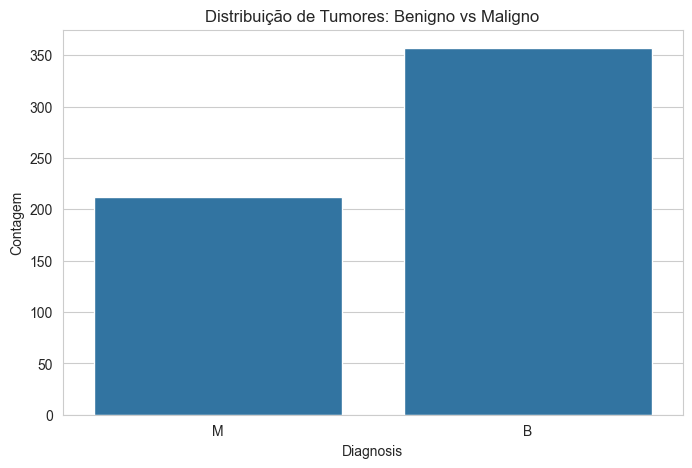

In [515]:
plt.figure()
sns.countplot(data=df, x='diagnosis')

plt.title('Distribuição de Tumores: Benigno vs Maligno')
plt.xlabel('Diagnosis')
plt.ylabel('Contagem')

plt.show()

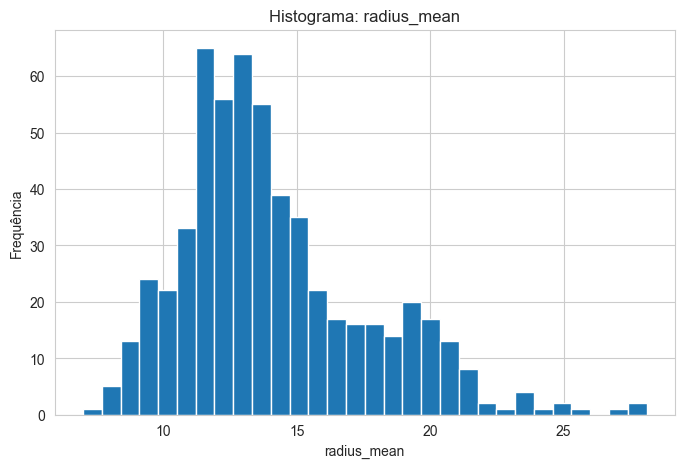

In [516]:
plt.figure()

df['radius_mean'].hist(bins=30)
plt.title('Histograma: radius_mean')
plt.xlabel('radius_mean')
plt.ylabel('Frequência')

plt.show()

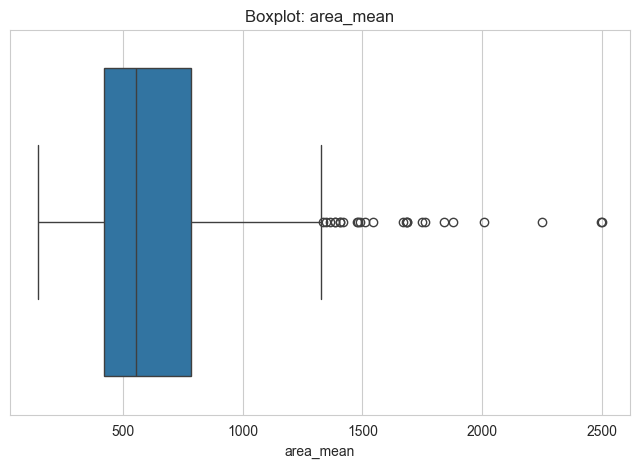

In [517]:
plt.figure()

sns.boxplot(x=df['area_mean'])
plt.title('Boxplot: area_mean')

plt.show()

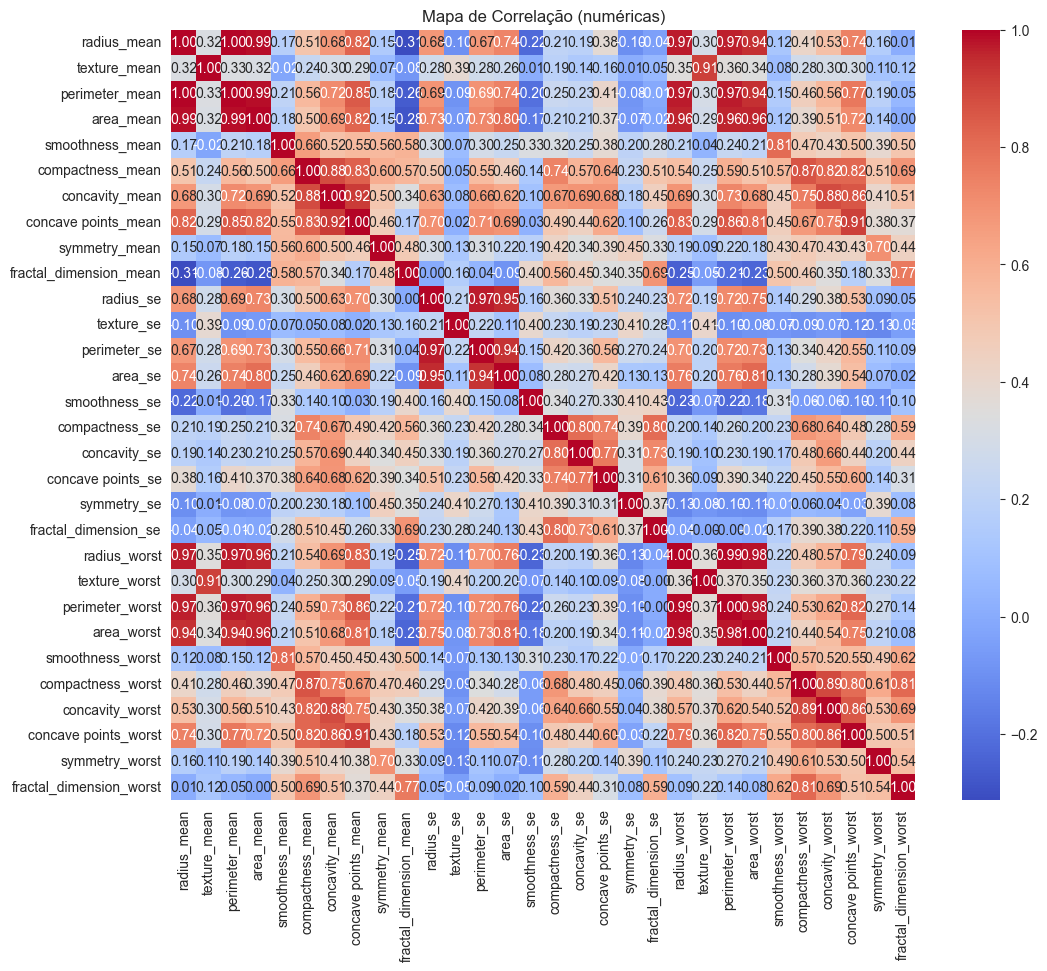

In [518]:
plt.figure(figsize=(12,10))

corr = num.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Correlação (numéricas)')

plt.show()

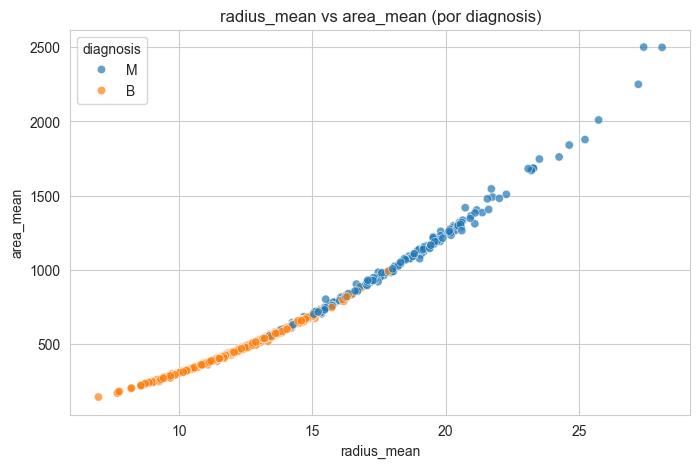

In [519]:
plt.figure()

sns.scatterplot(data=df, x='radius_mean', y='area_mean', hue='diagnosis', alpha=0.7)
plt.title('radius_mean vs area_mean (por diagnosis)')

plt.show()

# Pré-processamento dos Dados

In [520]:
# Remover colunas altamente correlacionadas entre si

# Seleciona somente colunas numéricas
df_numeric = df.select_dtypes(include=[np.number])

threshold = 0.95

corr_matrix = df_numeric.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = []
removed_pairs = []

for col in upper.columns:
    high_corr = upper.index[upper[col] > threshold].tolist()
    for corr_col in high_corr:
        if corr_col not in to_drop:
            to_drop.append(corr_col)
            removed_pairs.append((corr_col, col))

# Remove do dataframe original
df = df.drop(columns=to_drop)

print("Colunas removidas automaticamente por alta correlação:")
for removed, kept in removed_pairs:
    print(f"{removed}  (mantida: {kept})")

print("\nNovo shape do dataframe:", df.shape)


Colunas removidas automaticamente por alta correlação:
radius_mean  (mantida: perimeter_mean)
perimeter_mean  (mantida: area_mean)
radius_se  (mantida: perimeter_se)
area_mean  (mantida: radius_worst)
radius_worst  (mantida: perimeter_worst)
perimeter_worst  (mantida: area_worst)

Novo shape do dataframe: (569, 25)


In [521]:
TEST_SIZE_PERCENT = 0.2  # 20% dos dados para teste
RANDOM_STATE_SEED = 42   # Semente para reprodutibilidade da divisão

In [522]:
df

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0.9053,8.589,...,0.03003,0.006193,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,17.77,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.7339,3.398,...,0.01389,0.003532,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,21.25,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7869,4.585,...,0.02250,0.004571,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,20.38,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,1.1560,3.445,...,0.05963,0.009208,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,14.34,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7813,5.438,...,0.01756,0.005115,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,22.39,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.2560,7.673,...,0.01114,0.004239,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,28.25,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,2.4630,5.203,...,0.01898,0.002498,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,28.08,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1.0750,3.425,...,0.01318,0.003892,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,29.33,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,1.5950,5.772,...,0.02324,0.006185,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [523]:
print("\n--- ENCODING DA VARIÁVEL-ALVO ---")
encoder_diagnostico = LabelEncoder()


--- ENCODING DA VARIÁVEL-ALVO ---


In [524]:
# Criação da variável target (y)
y_target = encoder_diagnostico.fit_transform(df['diagnosis'])

In [525]:
# Definição das features (X)
X_features = df.drop('diagnosis', axis=1)
colunas_features = X_features.columns

print(f"Mapeamento: {encoder_diagnostico.classes_[0]} -> 0 | {encoder_diagnostico.classes_[1]} -> 1")
print(f"Shape de X (Features): {X_features.shape} | Shape de y (Target): {y_target.shape}")


Mapeamento: B -> 0 | M -> 1
Shape de X (Features): (569, 24) | Shape de y (Target): (569,)


In [526]:
print("\n--- DIVISÃO TREINO/TESTE ---")

X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_target,
    test_size=TEST_SIZE_PERCENT,
    random_state=RANDOM_STATE_SEED,
    stratify=y_target
)

print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")


--- DIVISÃO TREINO/TESTE ---
Shape de X_train: (455, 24)
Shape de X_test: (114, 24)


In [527]:
print("\n--- PADRONIZAÇÃO (Standard Scaling) ---")

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_df = pd.DataFrame(X_train_scaled, columns=colunas_features)
X_test_df = pd.DataFrame(X_test_scaled, columns=colunas_features)

print("Padronização concluída. Dados prontos para modelagem ✅")
print(f"Média do treino (1ª feature) após scale: {X_train_df.iloc[:, 0].mean():.2f}")
print(f"Desvio padrão do treino (1ª feature) após scale: {X_train_df.iloc[:, 0].std():.2f}")


--- PADRONIZAÇÃO (Standard Scaling) ---
Padronização concluída. Dados prontos para modelagem ✅
Média do treino (1ª feature) após scale: 0.00
Desvio padrão do treino (1ª feature) após scale: 1.00


In [528]:
# --- RESULTADOS FINAIS ---
print("\n--- RESULTADOS DO PRÉ-PROCESSAMENTO ---")
print(f"Treino → features (X_train_df): {X_train_df.shape}")
print(f"Teste  → features (X_test_df): {X_test_df.shape}")



--- RESULTADOS DO PRÉ-PROCESSAMENTO ---
Treino → features (X_train_df): (455, 24)
Teste  → features (X_test_df): (114, 24)


In [529]:
X_train_df.columns

Index(['texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Treinamento dos Modelos

In [530]:
# Criando os modelos
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=RANDOM_STATE_SEED)
rf  = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE_SEED)

In [531]:
# Treinando
svm.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Avaliação dos modelos

In [532]:
# Avaliando SVM
y_pred_svm = svm.predict(X_test_scaled)
print("=== SVM (RBF) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

=== SVM (RBF) ===
Accuracy: 0.9736842105263158
Confusion Matrix:
 [[72  0]
 [ 3 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [533]:
# Avaliando Random Forest
y_pred_rf = rf.predict(X_test_scaled)
print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


=== Random Forest ===
Accuracy: 0.9649122807017544
Confusion Matrix:
 [[72  0]
 [ 4 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

